![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

# **Proyecto de grado**
**Yury Aldana Diaz**

**Sergio Torres**

**John Sierra**

#LIBRERIAS

In [ ]:
""" librerias """

import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
### Kmedias
from sklearn.cluster import KMeans
##Metricas
from sklearn.metrics import silhouette_score
### Análisis descriptivo
from scipy import cluster
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
!pip install prince
### ACM
import prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Creación Dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Conexión con Drive

Mounted at /content/drive


In [ ]:
costo='/content/drive/MyDrive/PROYECTO-GRADO-EPS/DATOS/DATOS-F/Req5750_CostoMedico.txt' # Ruta en Drive
df_costo=pd.read_csv (costo, sep='|', decimal=",", encoding='latin-1') # Creación

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (16,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Descripción de datos

In [ ]:
def calculateNull(df):
  '''Descripción: Calcula la cantidad de nulos por columna en un Dataframe

    Parámetros de entrada:
    df (Dataframe): El dataframe que se va revisar

    Retorno:
    lista (list): Lista de la cantidad de nulos por columna

    Valores de error:
    Al ingresar un valor diferente a Dataframe
  '''
  lista=[]
  for col in df:
    lista.append(len(df[df[col].isnull()]))
  return lista
def datos(df):
  datos = {
    'Nombre de columna' : df.columns.values.tolist(),
    'Tipo de dato': df.dtypes.values.tolist(),
    'Cantidad valores únicos': df.nunique().tolist(),
    'Cantidad valores nulos': calculateNull(df),
    }
  info_datos = pd.DataFrame(datos)
  return info_datos

In [ ]:
df_costo.info() # Información del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792940 entries, 0 to 5792939
Data columns (total 30 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Fuente                   object 
 1   Anio                     int64  
 2   Mes                      int64  
 3   TipoIdentificacion       object 
 4   NumeroIdentificacion     int64  
 5   ESTADIO                  object 
 6   RESINCRONIZADOR          object 
 7   AnioFallecimiento        float64
 8   MesFallecimiento         int64  
 9   grEstandar               object 
 10  Patologia                object 
 11  Segmentacion             object 
 12  RegionalIpsAfiliado      object 
 13  ZonalIpsAfiliado         object 
 14  RegionalIpsPrestador     object 
 15  ZonalIpsPrestador        object 
 16  NitIpsPrestador          object 
 17  RazonSocialIpsPrestador  object 
 18  Nivel1                   object 
 19  Nivel2                   object 
 20  Nivel3                   object 
 21  Nivel4  

Eliminamos:

Fuente array(['AUTORIZACIONES'], dtype=object)

Anio array([2021])

Mes array([1, 5, 4, 3, 6, 2])

MesFallecimiento array([ 0,  6,  3,  8,  5,  4,  7,  9,  1,  2, 11, 12, 10])

Segmentacion array(['SIN SEGMENTACION', 'GESTION DE ENFERMEDAD', 'GESTION BASICA','GESTION DE CASO'], dtype=object)

NitIpsPrestador array(['892300678', '816001182', '899999151', ..., 891410661, 900164285,891103968], dtype=object)

RazonSocialIpsPrestador	 array(['ETICOS SERRANO GOMEZ (OPL)', 'AUDIFARMA S.A. (OPL)','E.S.E. HOSPITAL SAN RAFAEL DE FACATATIVA', 'E.S.E. HOSPITAL SAN ANTONIO DE TARAZA','CENTRO MEDICO LA FLORESTA', 'SUBSIDIADO-CLINICA BAHIA'],dtype=object)

ConteoUsuariosUnicos array([1])

In [ ]:
df_costo1 = df_costo.drop(['Fuente','Anio','Mes','MesFallecimiento','Segmentacion','NitIpsPrestador','RazonSocialIpsPrestador','ConteoUsuariosUnicos'], axis=1)

In [ ]:
df_costo1['AnioFallecimiento']=df_costo1['AnioFallecimiento'].fillna(0) # Reemplazamos nulos por 0 en la variable AnioFallecimiento

In [ ]:
# Remplazamos 0 y 1 en la variables AnioFallecimiento
a = []
for i in df_costo1['AnioFallecimiento']:
  if i == 0:
    a.append(0)
  else:
    a.append(1)

df_costo1=df_costo1.assign(Fallecido=a)
df_costo1=df_costo1.drop(['AnioFallecimiento'], axis=1)

In [ ]:
 datos(df_costo1) # Descripción del dataframe con la función datos

,Nombre de columna,Tipo de dato,Cantidad valores únicos,Cantidad valores nulos
0,TipoIdentificacion,object,6,0
1,NumeroIdentificacion,int64,553273,0
2,ESTADIO,object,4,0
3,RESINCRONIZADOR,object,2,0
4,grEstandar,object,13,0
5,Patologia,object,16,0
6,RegionalIpsAfiliado,object,9,0
7,ZonalIpsAfiliado,object,34,0
8,RegionalIpsPrestador,object,8,0
9,ZonalIpsPrestador,object,33,0


<AxesSubplot:>

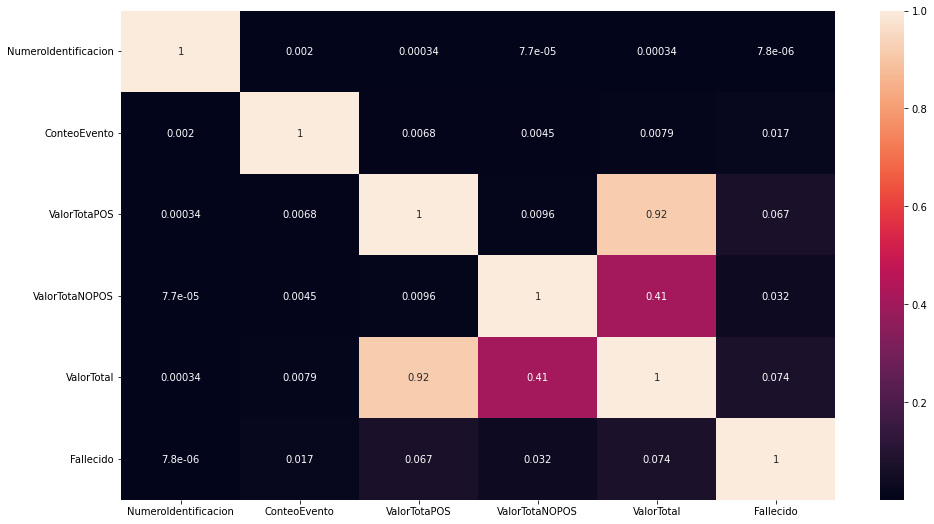

In [ ]:
# Correlación de variables
corre=df_costo1.corr()
plt.rcParams['figure.figsize'] = (16, 9)
sns.heatmap(corre, annot=True)

# **Revisión variables**

In [ ]:
def grafico_barras(base,columna,titulo,x,y,width):
  ''' FUNCIÓN grafico_barras
  Realiza grafico de barras deacuerdo a la columna dada del dataframe , con la función countplot de la librería seaborn

  Parámetros entrada:
  base= Dataframe de los datos a graficar
  columna=Nombre de la columna con la cual se quiere hacer el grafico
  titulo= Titulo del grafico - debe ser tipo texto
  x=Titulo para el eje x dentro del grafico
  y= Titulo para el eje y dentro del grafico
  width= Ancho del grafico - tipo numérico
  Parámetro retorno:
  Retorna el grafico con sus respectivos parámetros
  '''
  sns.set(style="darkgrid")
  sns.set(rc={'figure.figsize':(width, 6.0)})
  total = float(len(base[columna])) 
  ax = sns.countplot(x=columna, data=base, order = base[columna].value_counts().index) 
  ax.set(title=titulo, xlabel=x, ylabel=y)
  for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
              height + 1,
              '{:1.1f}'.format((height/total)*100)+'%',
              ha="center") 

         Porcentaje  Conteo         Valor
ESTADIO                                  
A         95.404439  527847  1.345205e+12
B          3.716429   20562  1.064705e+11
D          0.779181    4311  2.975579e+10
C          0.099951     553  3.029009e+09


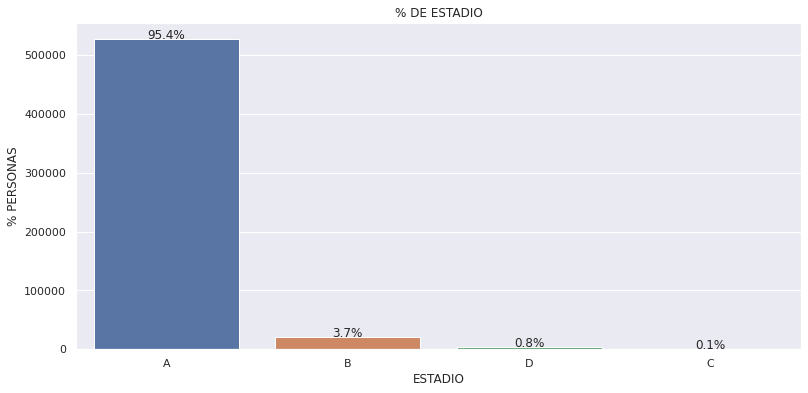

In [ ]:
# Se agupa la variable ESTADIO, haciendo conteo de pacientes y suma del valor procedimiento.
'''ESTADIO'''
tabla=df_costo1.groupby(["ESTADIO","NumeroIdentificacion"])['ValorTotal'].sum()
tabla=tabla.reset_index()
estadio=tabla.groupby("ESTADIO").agg({'ValorTotal': 'sum','NumeroIdentificacion':'count'})
estadio=estadio.sort_values('NumeroIdentificacion', ascending=False).rename(columns={'NumeroIdentificacion': 'Conteo', 'ValorTotal': 'Valor'})
estadio["Porcentaje"]=100*estadio["Conteo"]/tabla.shape[0]
print(estadio[{'Conteo','Valor','Porcentaje'}])
grafico_barras(tabla,'ESTADIO','% DE ESTADIO','ESTADIO','% PERSONAS',13.0) 

'''Estadio A : Pacientes que tienen una falla cardiaca, pero pueden realizar actividades de la vida diaria'''

                 Porcentaje  Conteo         Valor
RESINCRONIZADOR                                  
NO                99.969816  553106  1.476784e+12
SI                 0.030184     167  7.676230e+09


'NO: Pacientes que no tienen dependencia del resincronizador'

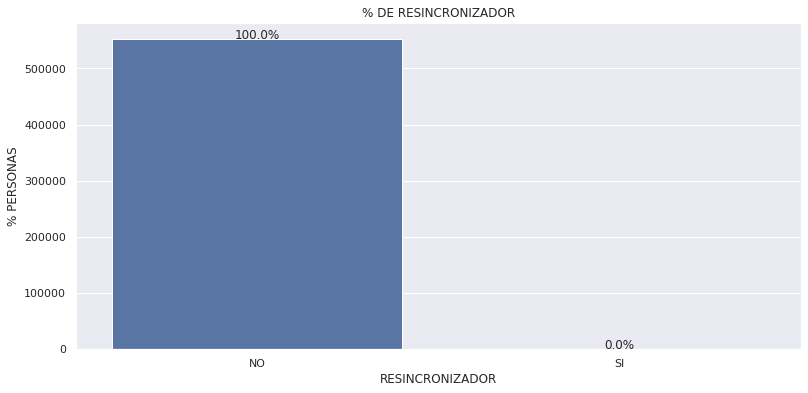

In [ ]:
# Se agupa la variable RESINCRONIZADOR, haciendo conteo de pacientes y suma del valor procedimiento.
'''RESINCRONIZADOR'''
tabla1=df_costo1.groupby(["RESINCRONIZADOR","NumeroIdentificacion"])['ValorTotal'].sum()
tabla1=tabla1.reset_index()
RESDR=tabla1.groupby("RESINCRONIZADOR").agg({'ValorTotal': 'sum','NumeroIdentificacion':'count'})
RESDR=RESDR.sort_values('NumeroIdentificacion', ascending=False).rename(columns={'NumeroIdentificacion': 'Conteo', 'ValorTotal': 'Valor'})
RESDR["Porcentaje"]=100*RESDR["Conteo"]/tabla1.shape[0]
print(RESDR[{'Conteo','Valor','Porcentaje'}])
grafico_barras(tabla1,'RESINCRONIZADOR','% DE RESINCRONIZADOR','RESINCRONIZADOR','% PERSONAS',13.0) 



'''NO: Pacientes que no tienen dependencia del resincronizador'''

                    Porcentaje  Conteo         Valor
TipoIdentificacion                                  
CC                   99.793230  552129  1.475737e+12
CE                    0.114410     633  2.770105e+09
RC                    0.043740     242  3.443440e+09
TI                    0.032534     180  2.291534e+09
PE                    0.015905      88  2.007978e+08
SC                    0.000181       1  1.738432e+07


' CC: Cedula de ciudadania\nLa mayoria de los pacientes son personas adultas'

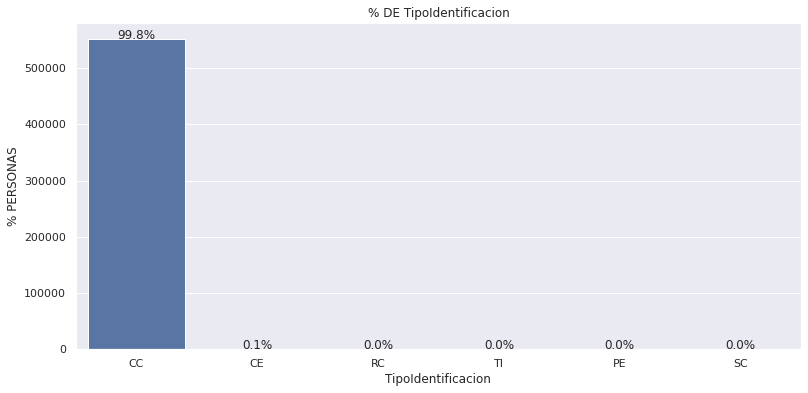

In [ ]:
# Se agupa la variable TipoIdentificacion, haciendo conteo de pacientes y suma del valor procedimiento.
'''TipoIdentificacion'''
tabla2=df_costo1.groupby(["TipoIdentificacion","NumeroIdentificacion"])['ValorTotal'].sum()
tabla2=tabla2.reset_index()
TipoId=tabla2.groupby("TipoIdentificacion").agg({'ValorTotal': 'sum','NumeroIdentificacion':'count'})
TipoId=TipoId.sort_values('NumeroIdentificacion', ascending=False).rename(columns={'NumeroIdentificacion': 'Conteo', 'ValorTotal': 'Valor'})
TipoId["Porcentaje"]=100*TipoId["Conteo"]/tabla2.shape[0]
print(TipoId[{'Conteo','Valor','Porcentaje'}])
grafico_barras(tabla2,'TipoIdentificacion','% DE TipoIdentificacion','TipoIdentificacion','% PERSONAS',13.0) 

''' CC: Cedula de ciudadania
La mayoria de los pacientes son personas adultas'''

                  Porcentaje  Conteo         Valor
grEstandar                                        
12. MAYOR DE 75    36.027595  206646  5.728554e+11
11. 70 A 74 AÑOS   16.022609   91902  2.357813e+11
10. 65 A 69 AÑOS   15.312329   87828  2.163113e+11
09. 60 A 64 AÑOS   12.382644   71024  1.691850e+11
08. 55 A 59 AÑOS    8.806664   50513  1.165735e+11
07. 50 A 54 AÑOS    5.553744   31855  6.640265e+10
05. 19 A 44 AÑOS    3.022088   17334  6.570251e+10
06. 45 A 49 AÑOS    2.794045   16026  3.591734e+10
02. 1 A 4 AÑOS      0.034172     196  2.891176e+09
03. 5 A 14 AÑOS     0.024408     140  1.969599e+09
04. 15 A 18 AÑOS    0.015865      91  7.831949e+08
01. MENOR 1 AÑO     0.003661      21  8.479618e+07
Sin grupo           0.000174       1  2.167502e+06


'MAYOR DE 75: Persona mayor de 75 años\nLos pacientes mayores de 50 años son los que mas presentan falla cardiaca'

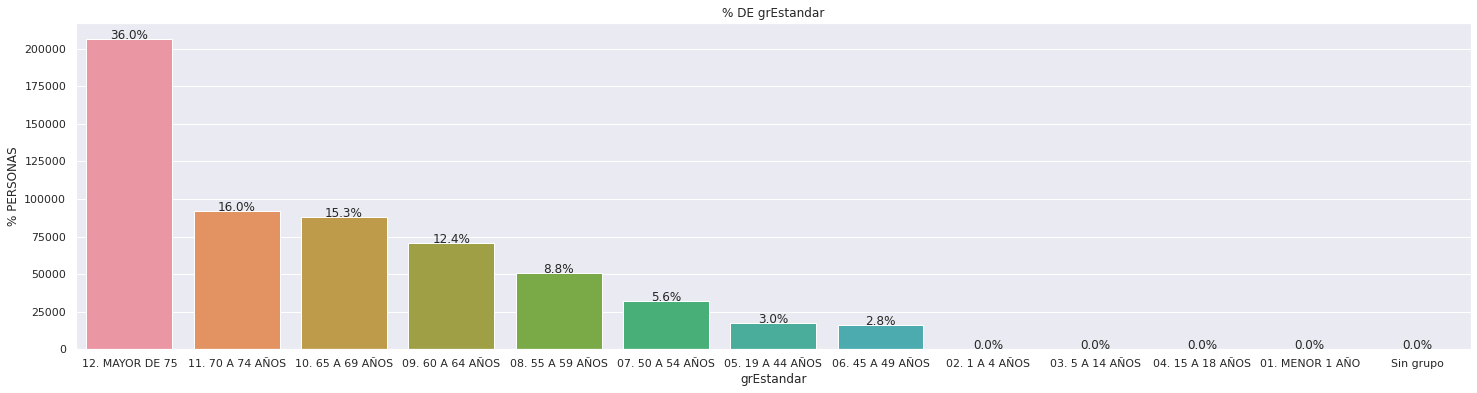

In [ ]:
# Se agupa la variable grEstandar, haciendo conteo de pacientes y suma del valor procedimiento.
'''grEstandar'''
tabla3=df_costo1.groupby(["grEstandar","NumeroIdentificacion"])['ValorTotal'].sum()
tabla3=tabla3.reset_index()
grEstandar=tabla3.groupby("grEstandar").agg({'ValorTotal': 'sum','NumeroIdentificacion':'count'})
grEstandar=grEstandar.sort_values('NumeroIdentificacion', ascending=False).rename(columns={'NumeroIdentificacion': 'Conteo', 'ValorTotal': 'Valor'})
grEstandar["Porcentaje"]=100*grEstandar["Conteo"]/tabla3.shape[0]
print(grEstandar[{'Conteo','Valor','Porcentaje'}])
grafico_barras(tabla3,'grEstandar','% DE grEstandar','grEstandar','% PERSONAS',25.0) 

'''MAYOR DE 75: Persona mayor de 75 años
Los pacientes mayores de 50 años son los que mas presentan falla cardiaca'''

                         Porcentaje  Conteo         Valor
RegionalIpsAfiliado                                      
REGIONAL BOGOTA           19.574107  108558  3.193304e+11
REGIONAL NOR OCCIDENTE    17.213487   95466  2.532494e+11
REGIONAL SUR OCCIDENTE    16.409845   91009  2.299441e+11
REGIONAL NORTE            12.969888   71931  1.850504e+11
REGIONAL EJE CAFETERO     10.556978   58549  1.312452e+11
REGIONAL CENTRO ORIENTE   10.246484   56827  1.496975e+11
REGIONAL NOR ORIENTE       9.711864   53862  1.312394e+11
ZONA ESPECIAL              2.730977   15146  4.919055e+10
SIN REGIONAL               0.586369    3252  3.551315e+10


' MOSTAR ESTO AL PROFESOR\nNO TODAS LAS REGIONALES TIENEN EL MISMO COSTO'

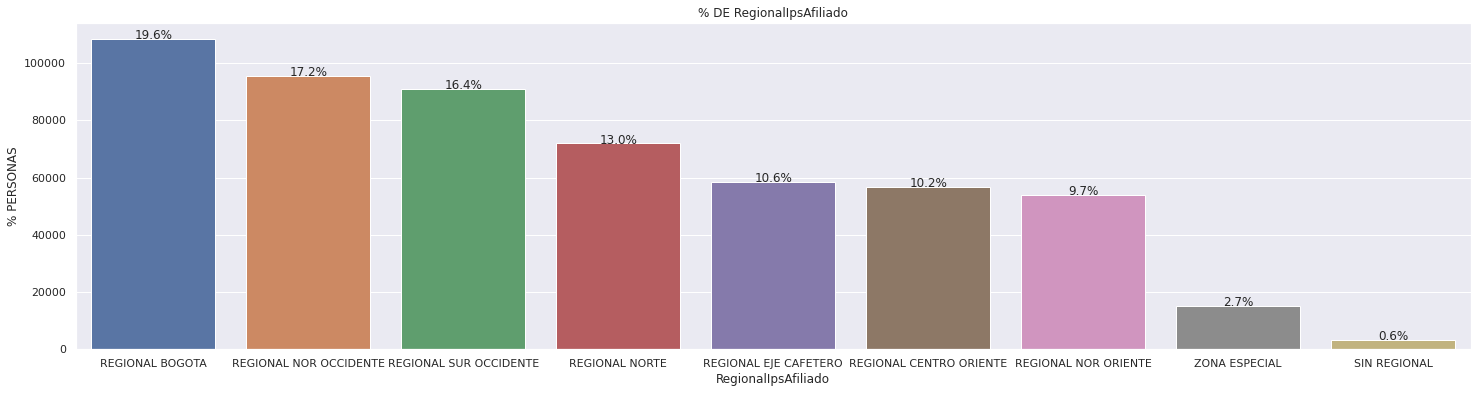

In [ ]:
# Se agupa la variable RegionalIpsAfiliado, haciendo conteo de pacientes y suma del valor procedimiento.
'''RegionalIpsAfiliado'''
tabla4=df_costo1.groupby(["RegionalIpsAfiliado","NumeroIdentificacion"])['ValorTotal'].sum()
tabla4=tabla4.reset_index()
RegIpsAfiliado=tabla4.groupby("RegionalIpsAfiliado").agg({'ValorTotal': 'sum','NumeroIdentificacion':'count'})
RegIpsAfiliado=RegIpsAfiliado.sort_values('NumeroIdentificacion', ascending=False).rename(columns={'NumeroIdentificacion': 'Conteo', 'ValorTotal': 'Valor'})
RegIpsAfiliado["Porcentaje"]=100*RegIpsAfiliado["Conteo"]/tabla4.shape[0]
print(RegIpsAfiliado[{'Conteo','Valor','Porcentaje'}])
grafico_barras(tabla4,'RegionalIpsAfiliado','% DE RegionalIpsAfiliado','RegionalIpsAfiliado','% PERSONAS',25.0) 

''' MOSTAR ESTO AL PROFESOR
NO TODAS LAS REGIONALES TIENEN EL MISMO COSTO'''

                              Conteo         Valor  Porcentaje
Patologia                                                     
12. HIPERTENSION ARTERIAL     295753  5.428895e+11   52.830961
11. DIABETES MELLITUS         167567  4.100387e+11   29.932834
05. CANCER                     36114  2.612938e+11    6.451117
07. EPOC                       26526  6.940864e+10    4.738393
00. SIN PATOLOGIA              18809  5.213208e+10    3.359890
03. ARTRITIS REUMATOIDEA        8977  4.121880e+10    1.603580
04. DIALISIS                    3616  7.289481e+10    0.645933
09. VIH                         1257  8.400217e+09    0.224540
02. ENF. HUERFANAS O RARAS       444  1.521197e+10    0.079313
14. ENFERMEDAD RENAL CRONICA     235  8.046687e+08    0.041979
06. ESCLEROSIS MULTIPLE          224  2.468240e+09    0.040014
13. TRASPLANTES                  112  1.419446e+09    0.020007
01. HEMOFILIA                    101  5.866948e+09    0.018042
15. PREDIALISIS                   59  2.236215e+08    0

'La enfermedad prebalece en pacientes con patologias cronicas como  HIPERTENSION ARTERIAL y DIABETES MELLITUS '

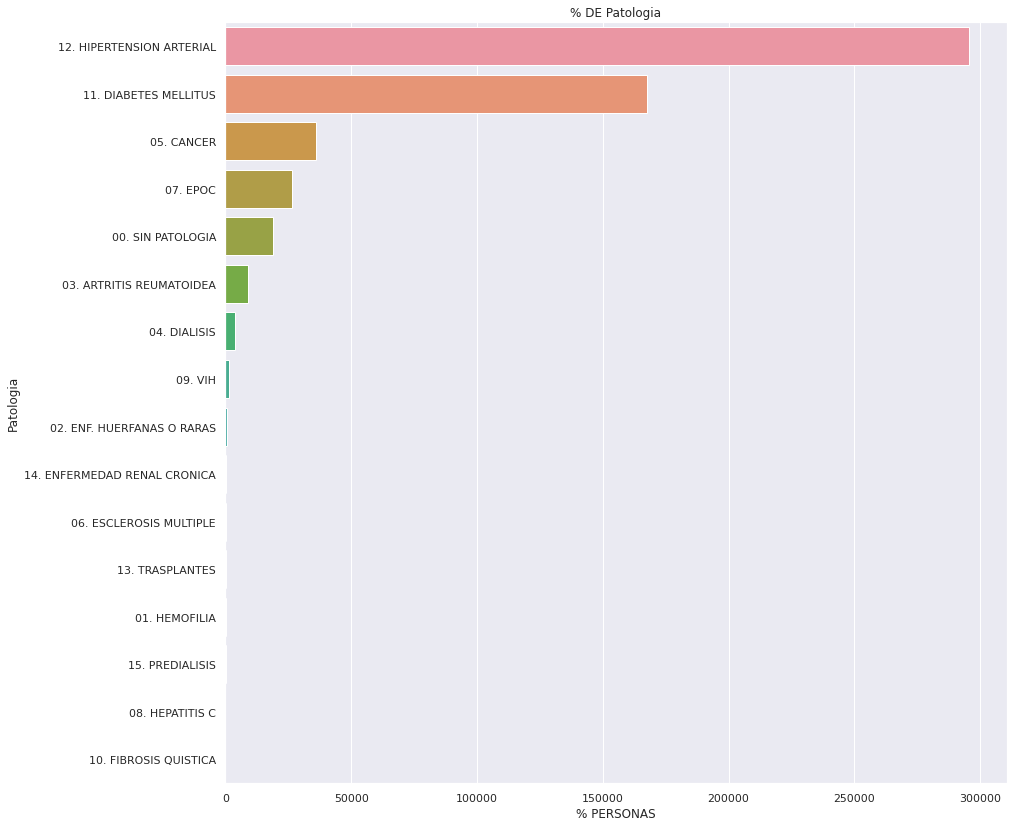

In [ ]:
# Se agupa la variable Patologia, haciendo conteo de pacientes y suma del valor procedimiento.
'''Patologia'''
tabla5=df_costo1.groupby(["Patologia","NumeroIdentificacion"])['ValorTotal'].sum()
tabla5=tabla5.reset_index()
Patologia=tabla5.groupby("Patologia").agg({'ValorTotal': 'sum','NumeroIdentificacion':'count'})
Patologia=Patologia.sort_values('NumeroIdentificacion', ascending=False).rename(columns={'NumeroIdentificacion': 'Conteo', 'ValorTotal': 'Valor'})
Patologia["Porcentaje"]=100*Patologia["Conteo"]/tabla5.shape[0]
print(Patologia[{'Conteo','Valor','Porcentaje'}])

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(14, 14)}) 
ax = sns.countplot(y='Patologia', data=tabla5, order = tabla5['Patologia'].value_counts().index) 
plot=ax.set(title='% DE Patologia', xlabel='% PERSONAS', ylabel='Patologia')
#grafico_barras(tabla5,'Patologia','% DE Patologia','Patologia','% PERSONAS',30.0) 
'''La enfermedad prebalece en pacientes con patologias cronicas como  HIPERTENSION ARTERIAL y DIABETES MELLITUS '''

                          Porcentaje  Conteo         Valor
ZonalIpsPrestador                                         
ZONAL BOGOTA               49.131636  370596  5.966119e+11
ZONAL ATLANTICO            11.155892   84148  1.189116e+11
ZONAL SANTANDER             6.531555   49267  8.684167e+10
ZONAL ANTIOQUIA             5.532075   41728  1.311345e+11
ZONAL VALLE DEL CAUCA       3.967296   29925  1.031122e+11
ZONAL CALDAS                2.265171   17086  4.409889e+10
ZONAL RISARALDA             2.005059   15124  1.871271e+10
ZONAL CUNDINAMARCA          1.962237   14801  2.183394e+10
ZONAL BOYACA                1.879378   14176  3.824543e+10
ZONAL NORTE DE SANTANDER    1.872882   14127  5.167450e+10
ZONAL QUINDIO               1.844379   13912  3.950719e+10
ZONAL TOLIMA                1.603225   12093  3.775305e+10
ZONAL CORDOBA               1.350273   10185  3.005706e+10
ZONAL CESAR                 1.178058    8886  1.580141e+10
ZONAL CAUCA                 1.104082    8328  1.977270e+

'MOSTAR ESTO AL PROFESOR\nNO TODAS LAS ZONALES TIENEN EL MISMO COSTO '

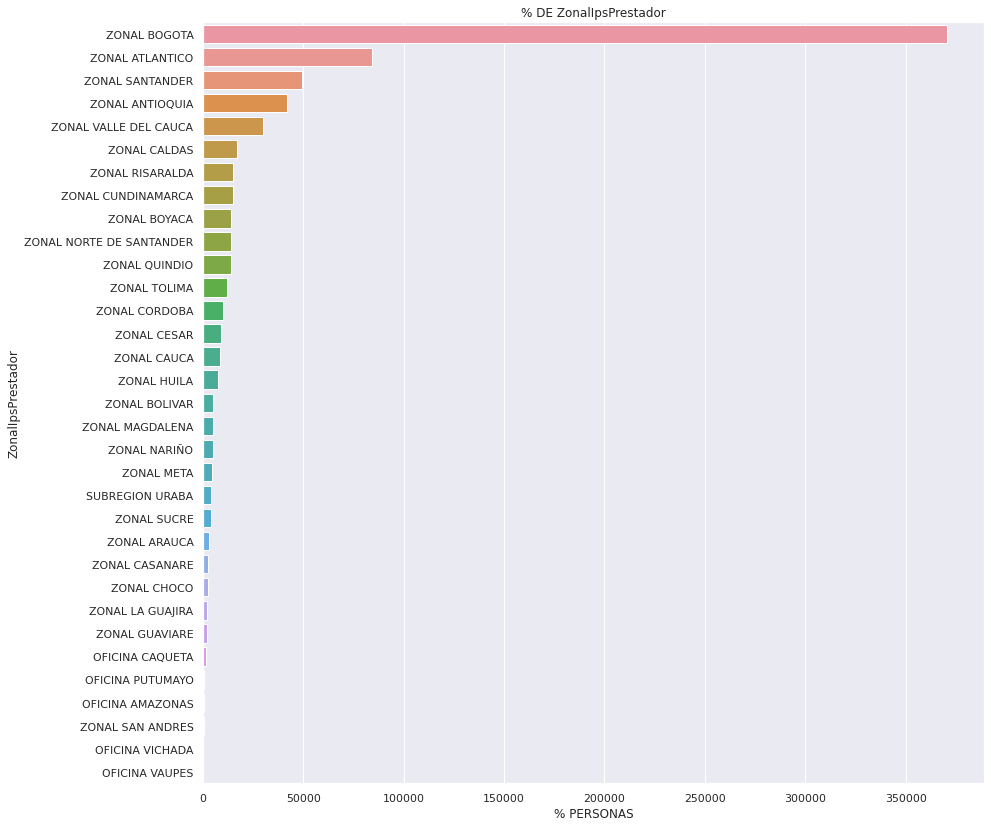

In [ ]:
# Se agupa la variable ZonalIpsPrestador, haciendo conteo de pacientes y suma del valor procedimiento.
'''ZonalIpsPrestador'''
tabla6=df_costo1.groupby(["ZonalIpsPrestador","NumeroIdentificacion"])['ValorTotal'].sum()
tabla6=tabla6.reset_index()
ZnIpsPrestador=tabla6.groupby("ZonalIpsPrestador").agg({'ValorTotal': 'sum','NumeroIdentificacion':'count'})
ZnIpsPrestador=ZnIpsPrestador.sort_values('NumeroIdentificacion', ascending=False).rename(columns={'NumeroIdentificacion': 'Conteo', 'ValorTotal': 'Valor'})
ZnIpsPrestador["Porcentaje"]=100*ZnIpsPrestador["Conteo"]/tabla6.shape[0]
print(ZnIpsPrestador[{'Conteo','Valor','Porcentaje'}])

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(14, 14)}) 
ax = sns.countplot(y='ZonalIpsPrestador', data=tabla6, order = tabla6['ZonalIpsPrestador'].value_counts().index) 
plot=ax.set(title='% DE ZonalIpsPrestador', xlabel='% PERSONAS', ylabel='ZonalIpsPrestador')

grafico_barras(tabla6,'ZonalIpsPrestador','% DE ZonalIpsPrestador','ZonalIpsPrestador','% PERSONAS',13.0) 


             Porcentaje  Conteo         Valor
EstadoCovid                                  
NO COVID          100.0  553273  1.484460e+12


' La variable EstadoCovid no es indispensable en el estudio se piensa en eliminarla de la base'

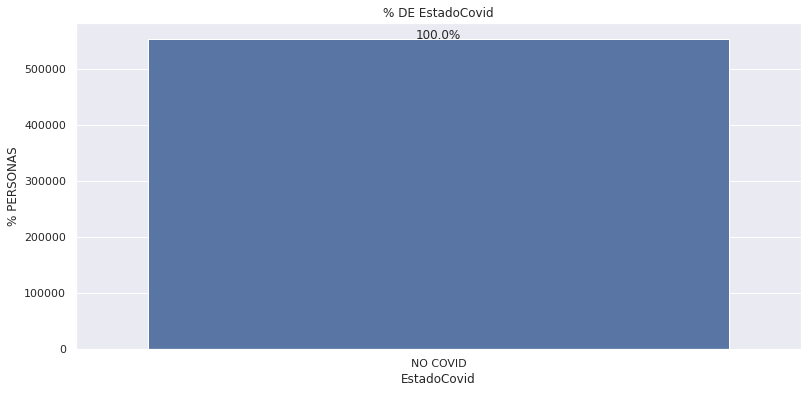

In [ ]:
# Se agupa la variable EstadoCovid, haciendo conteo de pacientes y suma del valor procedimiento.
'''EstadoCovid'''
tabla7=df_costo1.groupby(["EstadoCovid","NumeroIdentificacion"])['ValorTotal'].sum()
tabla7=tabla7.reset_index()
EstadoCovid=tabla7.groupby("EstadoCovid").agg({'ValorTotal': 'sum','NumeroIdentificacion':'count'})
EstadoCovid=EstadoCovid.sort_values('NumeroIdentificacion', ascending=False).rename(columns={'NumeroIdentificacion': 'Conteo', 'ValorTotal': 'Valor'})
EstadoCovid["Porcentaje"]=100*EstadoCovid["Conteo"]/tabla7.shape[0]
print(EstadoCovid[{'Conteo','Valor','Porcentaje'}])
grafico_barras(tabla7,'EstadoCovid','% DE EstadoCovid','EstadoCovid','% PERSONAS',13.0)

''' La variable EstadoCovid no es indispensable en el estudio se piensa en eliminarla de la base'''

##Recategorización de variables

In [ ]:
df_costo11=df_costo1

In [ ]:
# Se recategorizan algunas variables deacuerdo al negocio, ya que al momento de realizar los modelos de predicción se sobre carga el procesamiento.
# Patologia 
a=[]
for i in df_costo11['Patologia']:
  if i not in ('12. HIPERTENSION ARTERIAL','11. DIABETES MELLITUS','05. CANCER','07. EPOC','00. SIN PATOLOGIA'):
   a.append('otros')
  else:
   a.append(i)

df_costo11=df_costo11.assign(Patologia=a)

# ZonalIpsPrestador
a=[]
for i in df_costo11['ZonalIpsPrestador']:
  if i not in ('ZONAL BOGOTA', 'ZONAL ATLANTICO', 'ZONAL SANTANDER', 'ZONAL ANTIOQUIA', 'ZONAL VALLE DEL CAUCA', 'ZONAL CALDAS', 'ZONAL RISARALDA'):
   a.append('otros')
  else:
   a.append(i)

df_costo11=df_costo11.assign(ZonalIpsPrestador=a)

#ZonalIpsAfiliado

a=[]
for i in df_costo11['ZonalIpsAfiliado']:
  if i not in ('ZONAL BOGOTA', 'ZONAL ANTIOQUIA', 'ZONAL VALLE DEL CAUCA', 'ZONAL SANTANDER', 'ZONAL ATLANTICO', 'ZONAL CALDAS', 'ZONAL CUNDINAMARCA', 'ZONAL BOYACA', 'ZONAL RISARALDA', 'ZONAL TOLIMA', 'ZONAL NORTE DE SANTANDER', 'ZONAL BOLIVAR', 'ZONAL CAUCA', 'ZONAL CORDOBA', 'ZONAL QUINDIO' ):
   a.append('otros')
  else:
   a.append(i)

df_costo11=df_costo11.assign(ZonalIpsAfiliado=a)

#Nivel3

a=[]
for i in df_costo11['Nivel3']:
  if i not in ('MEDICAMENTO', 'PROCEDIMIENTOS DE DIAGNOSTICO', 'CONSULTA EXTERNA', 'MONITOREO Y CONTROL', 'ATENCION DOMICILIARIA', 'CONSULTA DE URGENCIAS', 'ABSORBENTES Y PAÑOS HUMEDOS', 'INTERNACION GENERAL'):
   a.append('otros')
  else:
   a.append(i)

df_costo11=df_costo11.assign(Nivel3=a)

#Nivel4

a=[]
for i in df_costo11['Nivel4']:
  if i not in ('INMUNOLOGIA', 'ROSUVASTATINA', 'CARVEDILOL', 'AGUJAS JERINGAS', 'ESPECIALIDADES', 'TIRILLAS', 'LANCETAS', 'INSULINA GLARGINA', 'CONSULTA DE URGENCIAS', 'SUBESPECIALIDADES'):
   a.append('otros')
  else:
   a.append(i)

df_costo11=df_costo11.assign(Nivel4=a)

#Nivel5
a=[]
for i in df_costo11['Nivel5']:
  if i not in ('INMUNOLOGIA', 'ROSUVASTATINA', 'CARVEDILOL', 'AGUJAS JERINGAS', 'ESPECIALIDADES', 'TIRILLAS', 'LANCETAS', 'INSULINA GLARGINA', 'CONSULTA DE URGENCIAS', 'SUBESPECIALIDADES'):
   a.append('otros')
  else:
   a.append(i)

df_costo11=df_costo11.assign(Nivel5=a)

                           Porcentaje  Conteo         Valor
Patologia                                                  
12. HIPERTENSION ARTERIAL   52.832187  295753  5.428895e+11
11. DIABETES MELLITUS       29.933529  167567  4.100387e+11
05. CANCER                   6.451267   36114  2.612938e+11
07. EPOC                     4.738503   26526  6.940864e+10
00. SIN PATOLOGIA            3.359968   18809  5.213208e+10
otros                        2.684545   15028  1.486974e+11


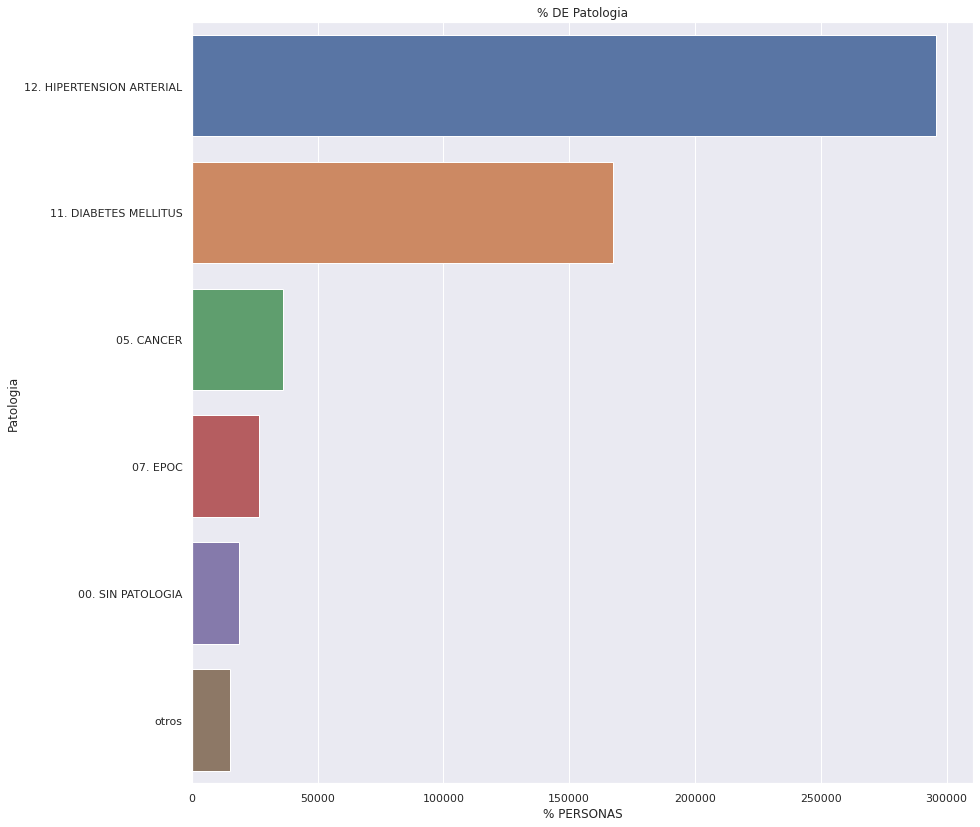

In [ ]:
# Se agupa la variable Patologia, haciendo conteo de pacientes y suma del valor procedimiento.
'''Patologia'''
tabla5=df_costo11.groupby(["Patologia","NumeroIdentificacion"])['ValorTotal'].sum()
tabla5=tabla5.reset_index()
Patologia=tabla5.groupby("Patologia").agg({'ValorTotal': 'sum','NumeroIdentificacion':'count'})
Patologia=Patologia.sort_values('NumeroIdentificacion', ascending=False).rename(columns={'NumeroIdentificacion': 'Conteo', 'ValorTotal': 'Valor'})
Patologia["Porcentaje"]=100*Patologia["Conteo"]/tabla5.shape[0]
print(Patologia[{'Conteo','Valor','Porcentaje'}])

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(14, 14)}) 
ax = sns.countplot(y='Patologia', data=tabla5, order = tabla5['Patologia'].value_counts().index) 
plot=ax.set(title='% DE Patologia', xlabel='% PERSONAS', ylabel='Patologia')

In [ ]:
# Se agupa la variable ZonalIpsPrestador, haciendo conteo de pacientes y suma del valor procedimiento.
'''ZonalIpsPrestador'''
tabla6=df_costo11.groupby(["ZonalIpsPrestador","NumeroIdentificacion"])['ValorTotal'].sum()
tabla6=tabla6.reset_index()
ZnIpsPrestador=tabla6.groupby("ZonalIpsPrestador").agg({'ValorTotal': 'sum','NumeroIdentificacion':'count'})
ZnIpsPrestador=ZnIpsPrestador.sort_values('NumeroIdentificacion', ascending=False).rename(columns={'NumeroIdentificacion': 'Conteo', 'ValorTotal': 'Valor'})
ZnIpsPrestador["Porcentaje"]=100*ZnIpsPrestador["Conteo"]/tabla6.shape[0]
print(ZnIpsPrestador[{'Conteo','Valor','Porcentaje'}])

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(14, 14)}) 
ax = sns.countplot(y='ZonalIpsPrestador', data=tabla6, order = tabla6['ZonalIpsPrestador'].value_counts().index) 
plot=ax.set(title='% DE ZonalIpsPrestador', xlabel='% PERSONAS', ylabel='ZonalIpsPrestador')

'\ntabla6=df_costo11.groupby(["ZonalIpsPrestador","NumeroIdentificacion"])[\'ValorTotal\'].sum()\ntabla6=tabla6.reset_index()\nZnIpsPrestador=tabla6.groupby("ZonalIpsPrestador").agg({\'ValorTotal\': \'sum\',\'NumeroIdentificacion\':\'count\'})\nZnIpsPrestador=ZnIpsPrestador.sort_values(\'NumeroIdentificacion\', ascending=False).rename(columns={\'NumeroIdentificacion\': \'Conteo\', \'ValorTotal\': \'Valor\'})\nZnIpsPrestador["Porcentaje"]=100*ZnIpsPrestador["Conteo"]/tabla6.shape[0]\nprint(ZnIpsPrestador[{\'Conteo\',\'Valor\',\'Porcentaje\'}])\n\nsns.set(style="darkgrid")\nsns.set(rc={\'figure.figsize\':(14, 14)}) \nax = sns.countplot(y=\'ZonalIpsPrestador\', data=tabla6, order = tabla6[\'ZonalIpsPrestador\'].value_counts().index) \nplot=ax.set(title=\'% DE ZonalIpsPrestador\', xlabel=\'% PERSONAS\', ylabel=\'ZonalIpsPrestador\')'

In [ ]:
# Se agupa la variable ZonalIpsAfiliado, haciendo conteo de pacientes y suma del valor procedimiento.
'''ZonalIpsAfiliado'''
tabla10=df_costo11.groupby(["ZonalIpsAfiliado","NumeroIdentificacion"])['ValorTotal'].sum()
tabla10=tabla10.reset_index()
ZnIpsAfiliado=tabla10.groupby("ZonalIpsAfiliado").agg({'ValorTotal': 'sum','NumeroIdentificacion':'count'})
ZnIpsAfiliado=ZnIpsAfiliado.sort_values('NumeroIdentificacion', ascending=False).rename(columns={'NumeroIdentificacion': 'Conteo', 'ValorTotal': 'Valor'})
ZnIpsAfiliado["Porcentaje"]=100*ZnIpsAfiliado["Conteo"]/tabla10.shape[0]
print(ZnIpsAfiliado[{'Conteo','Valor','Porcentaje'}])

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(14, 14)}) 
ax = sns.countplot(y='ZonalIpsAfiliado', data=tabla10, order = tabla10['ZonalIpsAfiliado'].value_counts().index) 
plot=ax.set(title='% DE ZonalIpsAfiliado', xlabel='% PERSONAS', ylabel='ZonalIpsAfiliado')  }


'\ntabla10=df_costo11.groupby(["ZonalIpsAfiliado","NumeroIdentificacion"])[\'ValorTotal\'].sum()\ntabla10=tabla10.reset_index()\nZnIpsAfiliado=tabla10.groupby("ZonalIpsAfiliado").agg({\'ValorTotal\': \'sum\',\'NumeroIdentificacion\':\'count\'})\nZnIpsAfiliado=ZnIpsAfiliado.sort_values(\'NumeroIdentificacion\', ascending=False).rename(columns={\'NumeroIdentificacion\': \'Conteo\', \'ValorTotal\': \'Valor\'})\nZnIpsAfiliado["Porcentaje"]=100*ZnIpsAfiliado["Conteo"]/tabla10.shape[0]\nprint(ZnIpsAfiliado[{\'Conteo\',\'Valor\',\'Porcentaje\'}])\n\nsns.set(style="darkgrid")\nsns.set(rc={\'figure.figsize\':(14, 14)}) \nax = sns.countplot(y=\'ZonalIpsAfiliado\', data=tabla10, order = tabla10[\'ZonalIpsAfiliado\'].value_counts().index) \nplot=ax.set(title=\'% DE ZonalIpsAfiliado\', xlabel=\'% PERSONAS\', ylabel=\'ZonalIpsAfiliado\')  }\n'

In [ ]:
# Se agupa la variable Nivel3, haciendo conteo de pacientes y suma del valor procedimiento.
'''Nivel3'''
tabla11=df_costo11.groupby(["Nivel3","NumeroIdentificacion"])['ValorTotal'].sum()
tabla11=tabla11.reset_index()
Nivel3=tabla11.groupby("Nivel3").agg({'ValorTotal': 'sum','NumeroIdentificacion':'count'})
Nivel3=Nivel3.sort_values('NumeroIdentificacion', ascending=False).rename(columns={'NumeroIdentificacion': 'Conteo', 'ValorTotal': 'Valor'})
Nivel3["Porcentaje"]=100*Nivel3["Conteo"]/tabla11.shape[0]
print(Nivel3[{'Conteo','Valor','Porcentaje'}])

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(14, 14)}) 
ax = sns.countplot(y='Nivel3', data=tabla11, order = tabla11['Nivel3'].value_counts().index) 
plot=ax.set(title='% DE Nivel3', xlabel='% PERSONAS', ylabel='Nivel3')

'\ntabla11=df_costo11.groupby(["Nivel3","NumeroIdentificacion"])[\'ValorTotal\'].sum()\ntabla11=tabla11.reset_index()\nNivel3=tabla11.groupby("Nivel3").agg({\'ValorTotal\': \'sum\',\'NumeroIdentificacion\':\'count\'})\nNivel3=Nivel3.sort_values(\'NumeroIdentificacion\', ascending=False).rename(columns={\'NumeroIdentificacion\': \'Conteo\', \'ValorTotal\': \'Valor\'})\nNivel3["Porcentaje"]=100*Nivel3["Conteo"]/tabla11.shape[0]\nprint(Nivel3[{\'Conteo\',\'Valor\',\'Porcentaje\'}])\n\nsns.set(style="darkgrid")\nsns.set(rc={\'figure.figsize\':(14, 14)}) \nax = sns.countplot(y=\'Nivel3\', data=tabla11, order = tabla11[\'Nivel3\'].value_counts().index) \nplot=ax.set(title=\'% DE Nivel3\', xlabel=\'% PERSONAS\', ylabel=\'Nivel3\')'

In [ ]:
# Se agupa la variable Nivel4, haciendo conteo de pacientes y suma del valor procedimiento.
'''Nivel4'''
tabla12=df_costo11.groupby(["Nivel4","NumeroIdentificacion"])['ValorTotal'].sum()
tabla12=tabla12.reset_index()
Nivel4=tabla12.groupby("Nivel4").agg({'ValorTotal': 'sum','NumeroIdentificacion':'count'})
Nivel4=Nivel4.sort_values('NumeroIdentificacion', ascending=False).rename(columns={'NumeroIdentificacion': 'Conteo', 'ValorTotal': 'Valor'})
Nivel4["Porcentaje"]=100*Nivel4["Conteo"]/tabla11.shape[0]
print(Nivel4[{'Conteo','Valor','Porcentaje'}].head(n=10))

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(14, 14)}) 
ax = sns.countplot(y='Nivel4', data=tabla12, order = tabla12['Nivel4'].value_counts().index) 
plot=ax.set(title='% DE Nivel4', xlabel='% PERSONAS', ylabel='Nivel4')


'\ntabla12=df_costo11.groupby(["Nivel4","NumeroIdentificacion"])[\'ValorTotal\'].sum()\ntabla12=tabla12.reset_index()\nNivel4=tabla12.groupby("Nivel4").agg({\'ValorTotal\': \'sum\',\'NumeroIdentificacion\':\'count\'})\nNivel4=Nivel4.sort_values(\'NumeroIdentificacion\', ascending=False).rename(columns={\'NumeroIdentificacion\': \'Conteo\', \'ValorTotal\': \'Valor\'})\nNivel4["Porcentaje"]=100*Nivel4["Conteo"]/tabla11.shape[0]\nprint(Nivel4[{\'Conteo\',\'Valor\',\'Porcentaje\'}].head(n=10))\n\nsns.set(style="darkgrid")\nsns.set(rc={\'figure.figsize\':(14, 14)}) \nax = sns.countplot(y=\'Nivel4\', data=tabla12, order = tabla12[\'Nivel4\'].value_counts().index) \nplot=ax.set(title=\'% DE Nivel4\', xlabel=\'% PERSONAS\', ylabel=\'Nivel4\')\n'

In [ ]:
# Se agupa la variable Nivel5, haciendo conteo de pacientes y suma del valor procedimiento.
'''Nivel5'''
tabla13=df_costo11.groupby(["Nivel5","NumeroIdentificacion"])['ValorTotal'].sum()
tabla13=tabla13.reset_index()
Nivel5=tabla13.groupby("Nivel5").agg({'ValorTotal': 'sum','NumeroIdentificacion':'count'})
Nivel5=Nivel5.sort_values('NumeroIdentificacion', ascending=False).rename(columns={'NumeroIdentificacion': 'Conteo', 'ValorTotal': 'Valor'})
Nivel5["Porcentaje"]=100*Nivel5["Conteo"]/tabla13.shape[0]
print(Nivel5[{'Conteo','Valor','Porcentaje'}].head(n=10))

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(14, 14)}) 
ax = sns.countplot(y='Nivel5', data=tabla13, order = tabla13['Nivel5'].value_counts().index) 
plot=ax.set(title='% DE Nivel5', xlabel='% PERSONAS', ylabel='Nivel5')


'\ntabla13=df_costo11.groupby(["Nivel5","NumeroIdentificacion"])[\'ValorTotal\'].sum()\ntabla13=tabla13.reset_index()\nNivel5=tabla13.groupby("Nivel5").agg({\'ValorTotal\': \'sum\',\'NumeroIdentificacion\':\'count\'})\nNivel5=Nivel5.sort_values(\'NumeroIdentificacion\', ascending=False).rename(columns={\'NumeroIdentificacion\': \'Conteo\', \'ValorTotal\': \'Valor\'})\nNivel5["Porcentaje"]=100*Nivel5["Conteo"]/tabla13.shape[0]\nprint(Nivel5[{\'Conteo\',\'Valor\',\'Porcentaje\'}].head(n=10))\n\nsns.set(style="darkgrid")\nsns.set(rc={\'figure.figsize\':(14, 14)}) \nax = sns.countplot(y=\'Nivel5\', data=tabla13, order = tabla13[\'Nivel5\'].value_counts().index) \nplot=ax.set(title=\'% DE Nivel5\', xlabel=\'% PERSONAS\', ylabel=\'Nivel5\')\n'

In [ ]:
datos(df_costo11) # Variables recategorizadas

,Nombre de columna,Tipo de dato,Cantidad valores únicos,Cantidad valores nulos
0,TipoIdentificacion,object,6,0
1,NumeroIdentificacion,int64,553273,0
2,ESTADIO,object,4,0
3,RESINCRONIZADOR,object,2,0
4,grEstandar,object,13,0
5,Patologia,object,6,0
6,RegionalIpsAfiliado,object,9,0
7,ZonalIpsAfiliado,object,16,0
8,RegionalIpsPrestador,object,8,0
9,ZonalIpsPrestador,object,8,0


## Cuantitativas


'\nValorTotaPOS\nValorTotaNOPOS\nValorTotal\n'

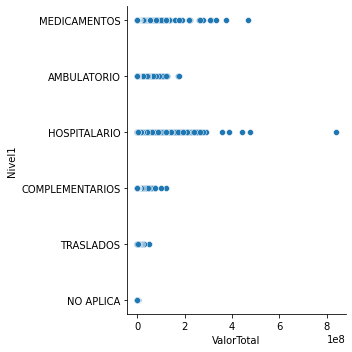

In [ ]:
#Relación entre variable ValorTotal y Nivel1
sns.relplot(x="ValorTotal", y="Nivel1", data=df_costo1)

'''
ValorTotaPOS
ValorTotaNOPOS
ValorTotal
'''

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


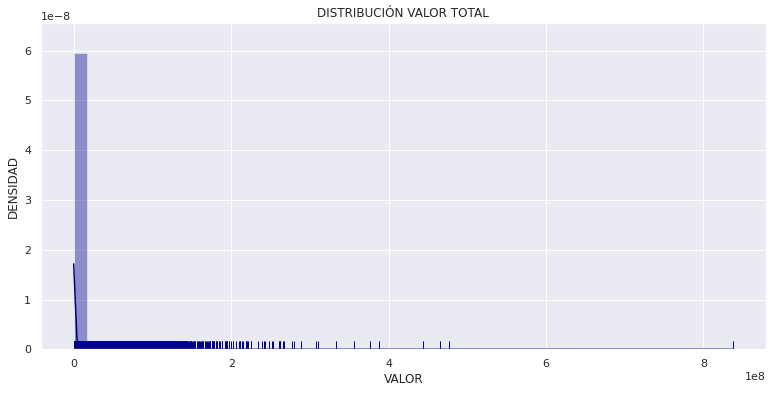

In [ ]:
# Distribución del ValorTotal
plot=sns.distplot(df_costo1['ValorTotal'], rug=True, color= 'darkblue').set(title='DISTRIBUCIÓN VALOR TOTAL', xlabel='VALOR', ylabel='DENSIDAD')

--------------------------------------------------------------------

#Estandarización de las Variables

Se elimina la variable marca ya que no aporta al estudio de la base de datos

In [ ]:
df_costo2 = df_costo11.drop(['MARCA'],axis=1)
datos(df_costo2)

,Nombre de columna,Tipo de dato,Cantidad valores únicos,Cantidad valores nulos
0,TipoIdentificacion,object,6,0
1,NumeroIdentificacion,int64,553273,0
2,ESTADIO,object,4,0
3,RESINCRONIZADOR,object,2,0
4,grEstandar,object,13,0
5,Patologia,object,6,0
6,RegionalIpsAfiliado,object,9,0
7,ZonalIpsAfiliado,object,16,0
8,RegionalIpsPrestador,object,8,0
9,ZonalIpsPrestador,object,8,0


Eliminar las variables ya que no aportan al modelo
- TipoIdentificacion
- RESINCRONIZADOR
- ZonalIpsPrestador
- ZonalIpsAfiliado
- EstadoCovid

In [ ]:
cuali = cuali.drop(['TipoIdentificacion','RESINCRONIZADOR','ZonalIpsPrestador','ZonalIpsAfiliado','EstadoCovid'],axis=1)